In [3]:
# can be removed if LinOT package is installed via pip
import sys
sys.path.append("../../lib")

import numpy as np

import LinOT
import LinOT.Visualization as Vis
import LinOT.auxiliary as aux

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('image', interpolation='nearest')
matplotlib.rc('figure',facecolor='white')
matplotlib.rc('image',cmap='viridis')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [4]:
# specify filenames for samples and tangent data
tag="ex1_single-ellipses"
subtag=""
filenameCenter="data/"+tag+"/center_data"+subtag+".npz"
filenameTan="data/"+tag+"/tan_data"+subtag+"_HK_kappa32.npz"

dat=np.load(filenameTan)
tanDataV=dat["tanListV"]
tanDataAlpha=dat["tanListAlpha"]
imgCenter=np.load(filenameCenter)["img"]

muRef,posRef=aux.processDensity_Grid(imgCenter,\
        totalMass=1.,keepZero=False)

kappa=32.

In [5]:
# create embedding object, add samples, center samples, perform pca
EmbeddingHK=LinOT.LinHKEmbedding(muRef,posRef,kappa=kappa)
EmbeddingHK.addSamples((tanDataV,tanDataAlpha))
EmbeddingHK.centerSamples()
EmbeddingHK.performPCA()
# same for SHK
EmbeddingSHK=LinOT.LinSHKEmbedding(muRef,posRef,kappa=kappa)
EmbeddingSHK.addSamples((tanDataV,tanDataAlpha),fromHK=True)
EmbeddingSHK.centerSamples()
EmbeddingSHK.performPCA()

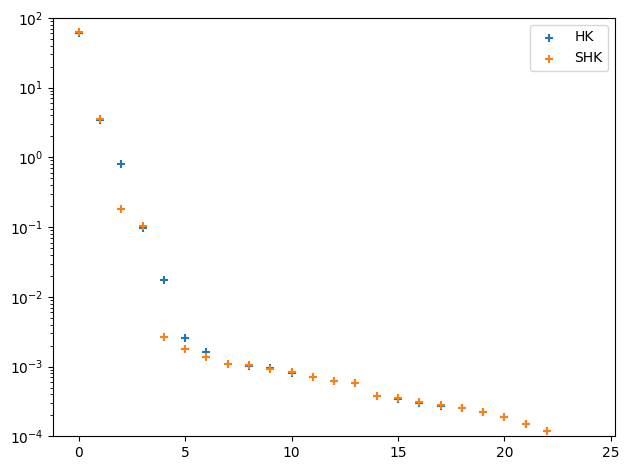

In [6]:
fig=plt.figure()
ax=fig.add_subplot()
ax.set_ylim(1E-4,1E2)
Vis.PCASpectrum(EmbeddingHK,ax=ax,label="HK")
Vis.PCASpectrum(EmbeddingSHK,ax=ax,label="SHK")
plt.legend()
plt.tight_layout()
plt.show()

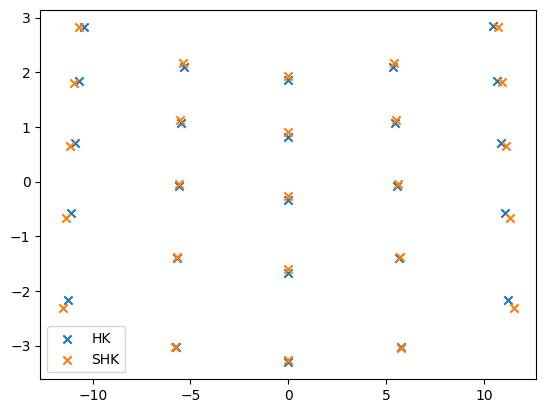

In [7]:
fig=plt.figure()
ax=fig.add_subplot()
Vis.PCAPlot(EmbeddingHK,ax=ax,label="HK")
Vis.PCAPlot(EmbeddingSHK,ax=ax,label="SHK")
plt.legend()
plt.show()

mass HK: 0.9324175251864092
mass SHK: 0.9999999999999996


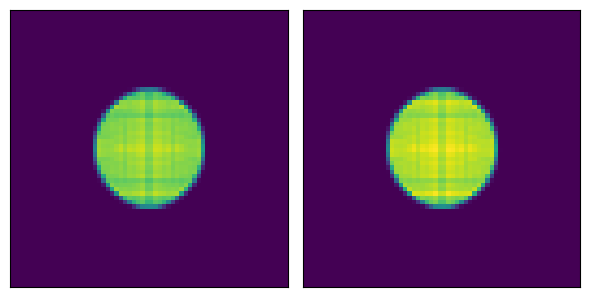

In [8]:
# compare means
resHK=EmbeddingHK.getMeanExp()
imgHK=aux.rasterizePointCloud2d(*resHK,(64,64,))

resSHK=EmbeddingSHK.getMeanExp()
imgSHK=aux.rasterizePointCloud2d(*resSHK,(64,64,))

print("mass HK:",np.sum(resHK[0]))
print("mass SHK:",np.sum(resSHK[0]))

Vis.ShowImageArray([imgHK,imgSHK],2,3,3,scaleMode="common")

0
[0.9906997  0.95832062 0.93889323 0.93241753 0.93889351 0.95832119
 0.99070055]


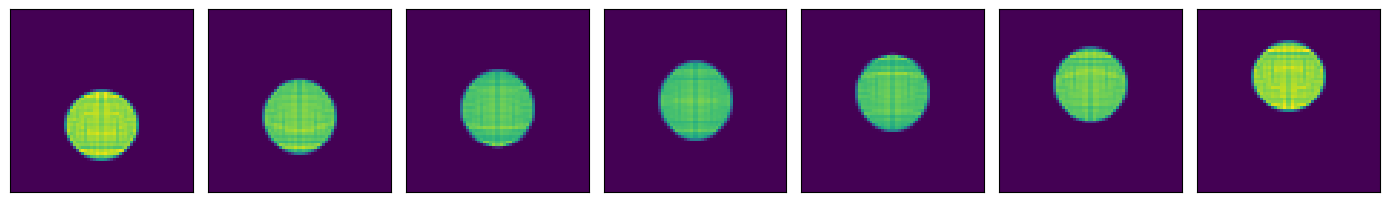

1
[0.94371926 0.93921245 0.93544521 0.93241753 0.9301294  0.92858084
 0.92777184]


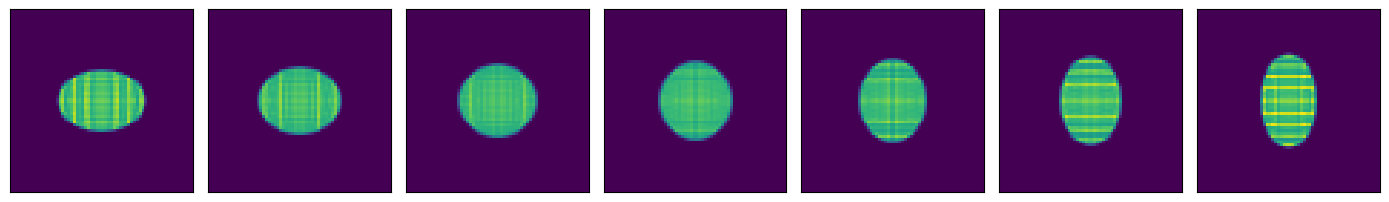

2
[0.98092051 0.96457956 0.9484119  0.93241753 0.91659644 0.90094865
 0.88547415]


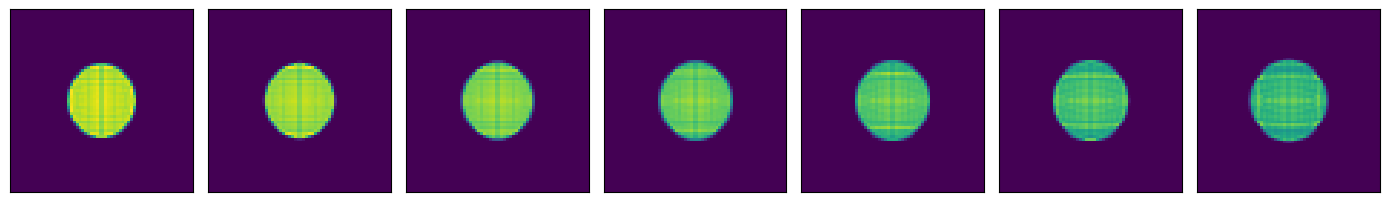

In [9]:
for i in [0,1,2]:
    print(i)
    vec=np.zeros(i+1)
    vec[i]=1.
    res=EmbeddingHK.expPCA(vec,tSeq=EmbeddingHK.pca_std[i]*np.linspace(-1,1,num=7))

    imgList=[aux.rasterizePointCloud2d(mu,pos,(64,64,)) for mu,pos in res]
    print(np.sum(imgList,axis=(1,2)))
    Vis.ShowImageArray(imgList,7,2,2,scaleMode="common")

0


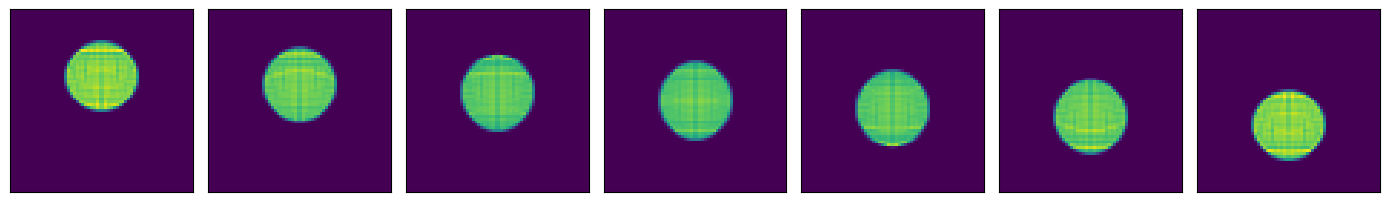

1


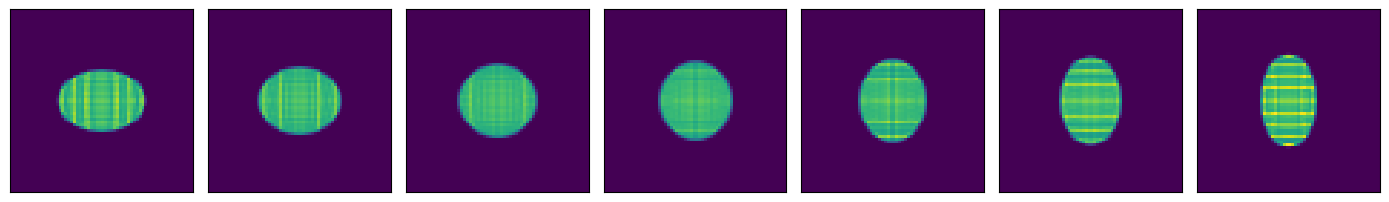

2


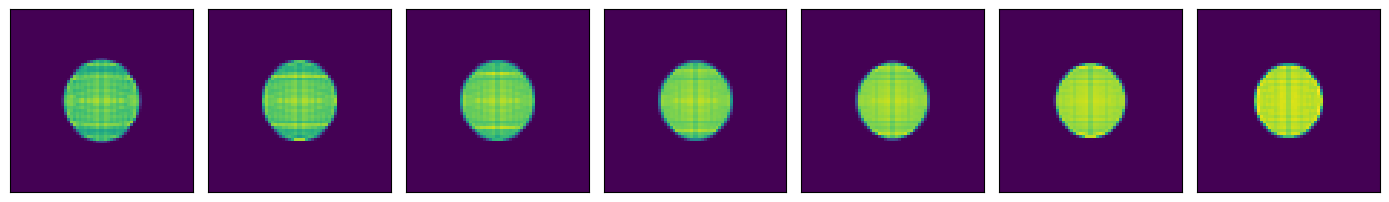

In [10]:
for i in [0,1,2]:
    print(i)
    vec=np.zeros(i+1)
    vec[i]=1.
    res=EmbeddingSHK.expPCA(vec,tSeq=EmbeddingSHK.pca_std[i]*np.linspace(-1,1,num=7))

    imgList=[aux.rasterizePointCloud2d(mu,pos,(64,64,)) for mu,pos in res]
    Vis.ShowImageArray(imgList,7,2,2,scaleMode="common")